# Question 1

Mean of this dist: 0.500986
Variance of this dist: 0.083202
--------------
Normalize covariance Matrix:
[[1.         0.00203874]
 [0.00203874 1.        ]]
Correlation Coefficient: 0.002039


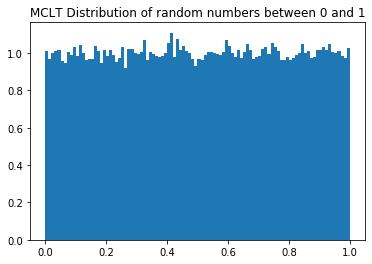

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

a =  40692 #from glen cowan
m = 2147483399 #from glen cowan
n = 50
N= 100000

r=[]
i=0

while i < N:
    n = np.mod(a*n , m)
    r.append(n/m)
    i +=1

count, bins, ignored = plt.hist(r, 100, density=True)
plt.title('MLCM Distribution of random numbers between 0 and 1')

print('Mean of this dist: %f'%np.mean(r))
print('Variance of this dist: %f' %np.var(r))
print('--------------')
k=0
a= []
b= []
while k < N-1:
    #print(r[k],r[k+1])
    #corr = (np.corrcoef(r[k],r[k+1]))
    a.append(r[k])
    b.append(r[k+1])
    k+=1

corr = np.corrcoef(a,b)
print('Normalize covariance Matrix:')
print(corr)
corra, _ = pearsonr(a, b)
print('Correlation Coefficient: %f' %corra)

1(i): I would not say the distribution is truly uniform but it is fairly close. Tests for uniformity could include the Kolmogorov-Smirnov test or Peasons's chi-squared test. The Kolomgorov-Smirvon test would be valid for small data samples to test for uniformity. The chi-squared test would be useful here and would measure the difference between this distribution and the true distribution or expected distribution. Any good test for the uniformity of random numbers would measure it against an ideal or expected distribution.  

Can also use the moments or a moments test to test uniformity as for a uniform distribution these moments will have exact values which can be numerically compared to the nth moment of our dist. 

Mean of this dist: 0.500643
Variance of this dist: 0.082834


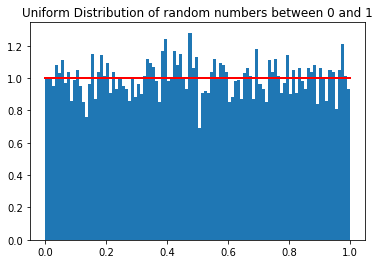

In [179]:
import matplotlib.pyplot as plt

N=10000
s = np.random.uniform(0,1,N)
count, bins, ignored = plt.hist(s,100,density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.title('Uniform Distribution of random numbers between 0 and 1')


print('Mean of this dist: %f'%np.mean(s))
print('Variance of this dist: %f' %np.var(s))


The mean and variance of the MLCM random number is 0.500986 and 0.083202 compared with 0.500643 and 0.082834 the difference is really small. The correlation coefficient is calculated by parsing the array into 2 arrays shifted by one value and the correlation found between them as 0.002039 meaning there is close to no correlation between them. 

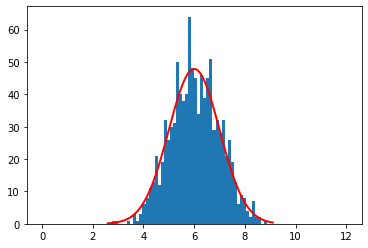

In [127]:
import matplotlib.pyplot as plt
import numpy as np

a =  40692 #from glen cowan
m = 2147483399 #from glen cowan
n = 50
N = 1000

mu= 6
sigma =1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
#print(s)

r = []
i1 = 0

while i1 < N:
    i2=0
    r1=[]
    while i2 < 12:
        n = np.mod(a*n,m)
        r1.append(n/m)
        i2+=1
    r.append(np.sum(r1))
    i1+=1

#count, bins, ignored = plt.hist(r, 100, density=True)
plt.hist(r,bins=100, range=(0,12))
plt.plot(bins,  120/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')


The CLT does work in this case as the distribution tends towards a normal distribution when generating these random numbers. 

# Question 2

To generate the Breit-Wigner Distribution using an inverse transform method we need to find the cumulative distribution function and then solve for E(r). To find the cumulative distribution we calculate the definite integral. 

In [195]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
r =  \frac{\Gamma_s (arctan(\frac{2E-2E_s}{\Gamma_s})+arctan(\frac{2E_s}{\Gamma_s})}{2 \pi} \\
E = \frac{\Gamma_s (tan(\frac{2 \pi r}{\Gamma_s} - arctan(\frac{2E_s}{\Gamma_s})))}{2}+\frac{E_s}{2}
\end{eqnarray}""")

<IPython.core.display.Latex object>

E is then used in the inverse function

A = 6.047039343046551
mu = 24.994531101457703
var =  2.7143652667513343


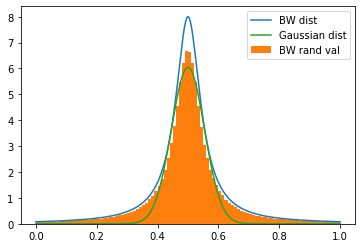

In [194]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize 

def breit_wigner(E,E_s, gamma_s):
    return gamma_s**2 / ((E-E_s)**2 + (gamma_s /2)**2)

def inverse(r, E_s,gamma_s):
    return E_s + gamma_s /2 * (np.tan((2*np.pi*r/gamma_s) - np.arctan(2*E_s / gamma_s))) 

def gauss(x,A,mu,sigma):
    return A * np.exp(-(x-mu)**2 / (2.*sigma**2))


E_max=50
E_s = 25
gamma_s = 5
N=1000
r = np.random.rand(1000000)*E_max #random numbers
E = np.linspace(0,E_max, N)
BW = breit_wigner(E,E_s, gamma_s) #breit wigner dist

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(E/E_max, BW*2, label="BW dist")

BW_E = inverse(r,E_s,gamma_s)
#print(BW_E)
BW_E2 = BW_E[np.logical_and(BW_E>0, BW_E < 50)] #disregarding
#print(BW_E2)
#print(len(BW_E2), len(BW_E))

count, bins, patches = ax.hist(BW_E2/E_max, bins=100, density=True, label="BW rand val")
#count, bins, patches = ax.hist(BW_E/E_max, bins=100, density=True, range=[0,50], label="BW rand val")

bin_centers = (bins[:-1] + bins[1:])/2

popt, pcov = scipy.optimize.curve_fit(gauss, bin_centers, count)
print('A =', popt[0])
print('mu =', popt[1]*E_max)
print('std dev = ', np.abs(popt[2]) * E_max)

x = np.linspace(0,1,1000)

plt.plot(x,gauss(x,*popt), label="Gaussian dist")

ax.legend()

plt.show()



The original E_s is very close to the mu calculated in the gaussian distribution. However, the Std dev is about half of the original gamma_s which is acocunted for is the width of the base of the dist